# Exercise 16

## Underfitting and Overfitting

Wir betrachten nun noch einmal das Regressionproblem mit den Meerschweinchen. Wir haben nun 4 Datensätze:
* `guineas_large_train.csv`, ein grosser Datensatz an Trainingsdaten
* `guineas_large_test.csv`, die zugehörigen Testdaten
* `guineas_small_train.csv`, ein kleiner Datensatz an Trainingsdaten
* `guineas_small_test.csv`, die zugehörigen Testdaten

Die Idee ist nun, dass wir das Modell mit dem `train` Datensatz trainieren und dann anhand des `test` Datensatz evaluieren.

### Aufgabe 1

Verwende den `RandomForestRegressor` um das Gewicht des Meerschweinchens anhand der anderen Attribute vorherzusagen. Trainiere das Modell mit dem `guineas_large_train.csv` Datensatz und bestimme dann den mittleren quadratischen Fehler mit `mean_squared_error`, sowohl auf den Trainingsdaten als auch auf den Testdaten (`guineas_large_test.csv`). Verwende falls nötig die Dokumentation von sklearn, dort sind auch Beipiele zu finden. Was fällt dir auf?

In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

training_data =  pd.read_csv('guineas_large_train.csv')
test_data =  pd.read_csv('guineas_large_test.csv')

regr = RandomForestRegressor(random_state=0)
regr.fit(training_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']], training_data['weight (g)'])

training_prediction = regr.predict(training_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']])
test_prediction = regr.predict(test_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']])

print(mean_squared_error(training_prediction, training_data['weight (g)']))
print(mean_squared_error(test_prediction, test_data['weight (g)']))

447.4188111117607
3362.209871435554


### Aufgabe 2

Verwende nun das `max_depth` Argument des `RandomForestRegressor`. Trainiere jeweils ein Modell für `max_depth=1, 2, 3..., 10`. Erstelle einen Plot des mittleren quadratischen Fehlers jeweils auf den Trainingsdaten und auf den Testsdaten. Das heisst auf der x-Achse ist `max_depth` und auf der y-Achse der Fehler. Kannst du den Plot und die Achsen beschriften und eine Legende machen? 

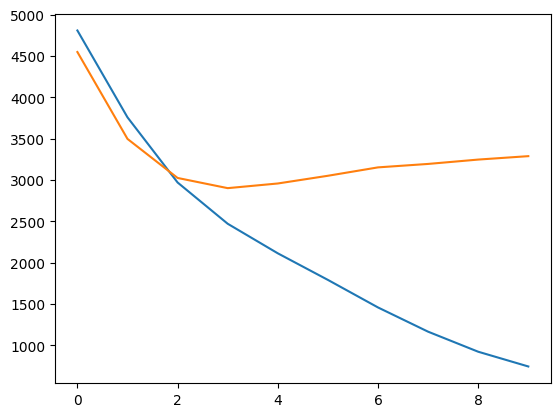

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

res_train = []
res_test = []

training_data =  pd.read_csv('guineas_large_train.csv')
test_data =  pd.read_csv('guineas_large_test.csv')

for i in range(1, 11):
    regr = RandomForestRegressor(random_state=0, max_depth=i)
    regr.fit(training_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']], training_data['weight (g)'])

    training_prediction = regr.predict(training_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']])
    test_prediction = regr.predict(test_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']])

    res_train.append(mean_squared_error(training_prediction, training_data['weight (g)']))
    res_test.append(mean_squared_error(test_prediction, test_data['weight (g)']))

plt.plot(res_train)
plt.plot(res_test)
plt.show()

### Aufgabe 3

Wiederhole nun Aufgabe 2, verwende aber die `small` Datensätze. Was stellst du fest?

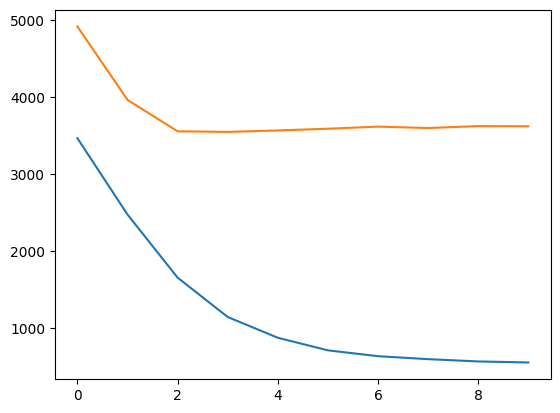

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

res_train = []
res_test = []

training_data =  pd.read_csv('guineas_small_train.csv')
test_data =  pd.read_csv('guineas_small_test.csv')

for i in range(1, 11):
    regr = RandomForestRegressor(random_state=0, max_depth=i)
    regr.fit(training_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']], training_data['weight (g)'])

    training_prediction = regr.predict(training_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']])
    test_prediction = regr.predict(test_data[['size (cm)', 'is_male', 'is_sick', 'age (y)', 'max_speed (m/s)']])

    res_train.append(mean_squared_error(training_prediction, training_data['weight (g)']))
    res_test.append(mean_squared_error(test_prediction, test_data['weight (g)']))

plt.plot(res_train)
plt.plot(res_test)
plt.show()

In [16]:
import pandas as pd
import numpy as np

guineas = pd.read_csv('guineas_large.csv')
print(guineas)

df = pd.DataFrame(np.random.randn(1000, 2))
msk = np.random.rand(len(df)) < 0.1
train = guineas[msk]
test = guineas[~msk]

train.to_csv('guineas_small_train.csv', index=False)
test.to_csv('guineas_small_test.csv', index=False)

                      name  intercept  size (cm)  weight (g)  is_male  \
0     Hanlsli der Traurige          1  18.317003  247.708373        1   
1        Hanlsli der Agile          1  26.150824  457.781847        1   
2     Belinda die Schnelle          1  10.872650  255.422259        0   
3        Belinda die Sture          1  23.394176  323.029316        0   
4      Belinda die Listige          1  18.500255  361.566937        0   
..                     ...        ...        ...         ...      ...   
995     Gerda die Schnelle          1  16.444804  405.129917        0   
996    Petra die Gescheite          1  17.631003  158.678781        0   
997  Adalwolf der Haudegen          1  26.673173  432.702574        1   
998      Petra die Lustige          1  18.617531  231.255029        0   
999      Petra die Lustige          1  15.415422  257.089769        0   

     is_sick   age (y)  max_speed (m/s)  
0          1  1.724806         2.069387  
1          0  0.522069         1.910388